In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import gc
pd.options.mode.chained_assignment = None

root = 'c:/P2M_TESTS/working_on_it/'

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

Reading data

In [3]:
df1=pd.read_csv("c:/P2M_TESTS/working_on_it/Data/2017.txt", sep=" " ,delimiter=";")


C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df2=pd.read_csv("c:/P2M_TESTS/working_on_it/Data/2018.txt", sep=" " ,delimiter=";")

## EDA -Data Preprocessing

In [5]:
#merging the 2 datasets 
df=pd.concat([df1, df2])

In [6]:
df.tail()

,Store_ID,Date,Basket_ID,Structure_ID,Article_ID,Quantity,Amount_Paid,Cust_ID
1960989,91,20181231,91648594,2865438133779,71032374.0,2.0,9.091,796985
1960990,91,20181231,91648594,2866480013777,70633122.0,1.0,1.818,796985
1960991,91,20181231,91648594,2866480037979,70632850.0,2.0,3.636,796985
1960992,91,20181231,91648594,2866480037979,70730410.0,1.0,1.818,796985
1960993,91,20181231,91648594,2866480037979,70730412.0,1.0,1.818,796985


In [11]:
df.isnull().sum()

Store_ID        0
Date            0
Basket_ID       0
Structure_ID    0
Article_ID      0
Quantity        0
Amount_Paid     0
Cust_ID         0
dtype: int64

In [8]:
#removing observations tht have null values 'Structure_ID' and 'Article_ID'
df = df[pd.notnull(df['Structure_ID'])]

In [10]:
print(df[df['Quantity']<0 ])

         Store_ID      Date  Basket_ID   Structure_ID   Article_ID  Quantity  \
1545           91  20170101   91290281  1173201070159  662000067.0     -3.00   
2933           91  20170102   91027217  1443643010202  436041880.0     -1.00   
2934           91  20170102   91027217  1443643010202  436042700.0     -1.00   
2935           91  20170102   91027217  1443654010702  434001480.0     -1.00   
2936           91  20170102   91027217  1443654010702  434001640.0     -1.00   
...           ...       ...        ...            ...          ...       ...   
1956265        91  20181231   91415076  1114121011126  613480497.0     -2.00   
1957822        91  20181231   91454917  1335523010701  700082008.0     -1.00   
1958054        91  20181231   91476487  1114149020222  645080010.0     -1.00   
1958608        91  20181231   91546329  1203600010701  641784448.0     -1.06   
1960272        91  20181231   91581148  1101168130101  611642657.0     -1.00   

         Amount_Paid  Cust_ID  
1545   

As we can see, there are 3089 rows ( observations ) with negative quantities, they correspond to mistakes made during data collection and must be removed 

In [12]:
# removing observations having Quantity<0 
df=df[(df['Quantity']>0)]

In [13]:
df.shape

(3921694, 8)

In [17]:
print("Number of unique customer ID: {}".format(df['Cust_ID'].nunique()))

Number of unique customer ID: 22990


After doing some cleaning, our dataframe contains 3 921 694 observations in total 

In [14]:
#converting 'Date' into Datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [15]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Day of Week'] = df['Date'].dt.dayofweek

<ipython-input-15-f94811dda6a7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


In [16]:
df

,Store_ID,Date,Basket_ID,Structure_ID,Article_ID,Quantity,Amount_Paid,Cust_ID,Year,Month,Week,Day of Week
0,91,2017-01-01,91010227,2512384190301,392900030.0,1.0,1.390,18579,2017,1,52,6
1,91,2017-01-01,91010227,2544340090301,396900550.0,1.0,2.500,18579,2017,1,52,6
2,91,2017-01-01,91010227,2866718070977,25000135.0,1.0,2.600,18579,2017,1,52,6
3,91,2017-01-01,91010227,2866718070977,25000145.0,1.0,2.450,18579,2017,1,52,6
4,91,2017-01-01,91010227,2866718071177,24400444.0,2.0,5.380,18579,2017,1,52,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1960989,91,2018-12-31,91648594,2865438133779,71032374.0,2.0,9.091,796985,2018,12,1,0
1960990,91,2018-12-31,91648594,2866480013777,70633122.0,1.0,1.818,796985,2018,12,1,0
1960991,91,2018-12-31,91648594,2866480037979,70632850.0,2.0,3.636,796985,2018,12,1,0
1960992,91,2018-12-31,91648594,2866480037979,70730410.0,1.0,1.818,796985,2018,12,1,0


## EDA -Feature Engineering

In [16]:
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})
df["Day of Week"] = df["Day of Week"].map(dayofweek_mapping)

In [18]:
df

,Store_ID,Date,Basket_ID,Structure_ID,Article_ID,Quantity,Amount_Paid,Cust_ID,Year,Month,Week,Day of Week
0,91,2017-01-01,91010227,2512384190301,392900030.0,1.0,1.390,18579,2017,1,52,Sunday
1,91,2017-01-01,91010227,2544340090301,396900550.0,1.0,2.500,18579,2017,1,52,Sunday
2,91,2017-01-01,91010227,2866718070977,25000135.0,1.0,2.600,18579,2017,1,52,Sunday
3,91,2017-01-01,91010227,2866718070977,25000145.0,1.0,2.450,18579,2017,1,52,Sunday
4,91,2017-01-01,91010227,2866718071177,24400444.0,2.0,5.380,18579,2017,1,52,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
1960989,91,2018-12-31,91648594,2865438133779,71032374.0,2.0,9.091,796985,2018,12,1,Monday
1960990,91,2018-12-31,91648594,2866480013777,70633122.0,1.0,1.818,796985,2018,12,1,Monday
1960991,91,2018-12-31,91648594,2866480037979,70632850.0,2.0,3.636,796985,2018,12,1,Monday
1960992,91,2018-12-31,91648594,2866480037979,70730410.0,1.0,1.818,796985,2018,12,1,Monday


then see transactions by month, year, day of the week ..

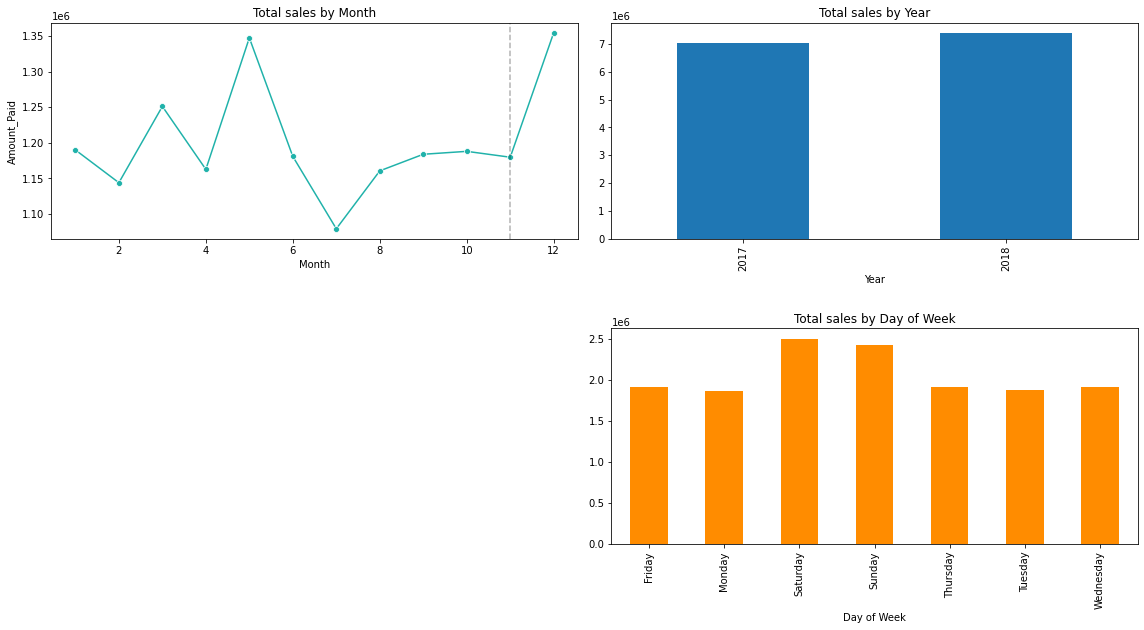

In [17]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Amount_Paid", data = df.groupby("Month").sum("Amount_Paid"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
#plt.text(4.50, 1.3e4, "Most Transactions")
plt.title("Total sales by Month")
plt.subplot(3,2,2)
df.groupby("Year").sum()["Amount_Paid"].plot(kind = "bar")
plt.title("Total sales by Year")
plt.subplot(3,2,4)
df.groupby("Day of Week").sum()["Amount_Paid"].plot(kind = "bar", color = "darkorange")
plt.title("Total sales by Day of Week")
plt.tight_layout()
plt.show()

 ### Plots Analysis 
 
 - Total sales per Day of Week: most sales happen on the weekends ( saturday and sunday )  and it's practically the same on the other days 
 - Total Sales by Year : 2018 is more profitable than 2017
 - Total Sales per Month : in summer (  July 7 ) there is a significant decline in sales than in other months, i wonder why is that !
 Also, most of the sales happened in May and December

1. INSIGHT ON PRODUCTS AND CUSTOMERS 

* Let's see which articles are the most popular among users 

In [18]:

product_unique_users = df.groupby('Article_ID')['Cust_ID'].nunique().reset_index().rename(columns={'Cust_ID':'total_customers'})
product_unique_users.sort_values('total_customers', ascending = False).head(10)

,Article_ID,total_customers
32693,556800290.0,8813
40452,848600100.0,7957
38165,715180033.0,7021
39943,842000200.0,6774
39868,841100500.0,6697
37588,681001489.0,6276
39899,841300130.0,6172
36998,660080207.0,5897
39924,841450900.0,5728
39875,841101100.0,5526


Article with the id = 556800290 is the most popular one among customers ( 8813 customers have purchased it ) 

In [21]:
# cumulative sum of unique users (customers) per product 

dfcum = product_unique_users.sort_values("total_customers", ascending=False)
dfcum['cum_customers'] = dfcum['total_customers'].cumsum()
dfcum = dfcum.reset_index(drop=True)
dfcum.head()

,Article_ID,total_users,cum_users
0,556800290.0,8813,8813
1,848600100.0,7957,16770
2,715180033.0,7021,23791
3,842000200.0,6774,30565
4,841100500.0,6697,37262


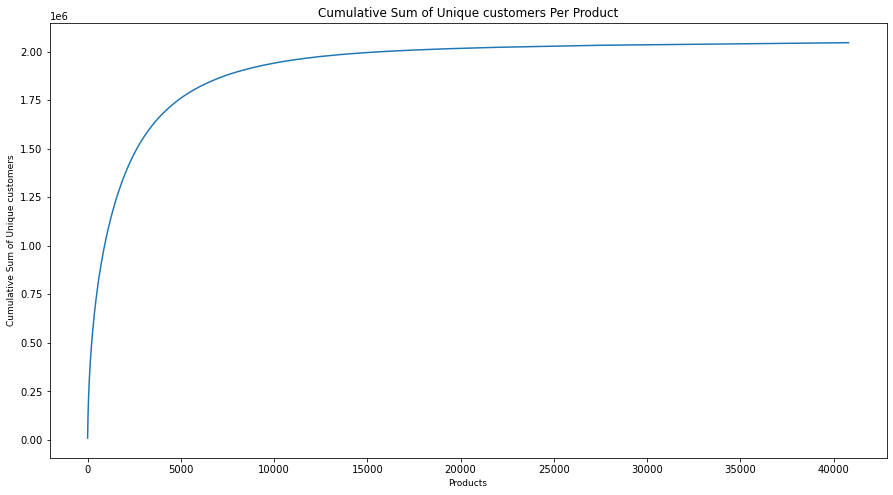

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = dfcum.index, y=dfcum.cum_users)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum of Unique customers", size = 9)
ax.set_title("Cumulative Sum of Unique customers Per Product", size = 12)
plt.show()

* Which 'rayons' , 'groups' are the most popular among customers 

In [23]:
##############################################TO DEVELOP#######################

* Frequency of total visits/purchases per customer

In [19]:
df

,Store_ID,Date,Basket_ID,Structure_ID,Article_ID,Quantity,Amount_Paid,Cust_ID,Year,Month,Week,Day of Week
0,91,2017-01-01,91010227,2512384190301,392900030.0,1.0,1.390,18579,2017,1,52,Sunday
1,91,2017-01-01,91010227,2544340090301,396900550.0,1.0,2.500,18579,2017,1,52,Sunday
2,91,2017-01-01,91010227,2866718070977,25000135.0,1.0,2.600,18579,2017,1,52,Sunday
3,91,2017-01-01,91010227,2866718070977,25000145.0,1.0,2.450,18579,2017,1,52,Sunday
4,91,2017-01-01,91010227,2866718071177,24400444.0,2.0,5.380,18579,2017,1,52,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
1960989,91,2018-12-31,91648594,2865438133779,71032374.0,2.0,9.091,796985,2018,12,1,Monday
1960990,91,2018-12-31,91648594,2866480013777,70633122.0,1.0,1.818,796985,2018,12,1,Monday
1960991,91,2018-12-31,91648594,2866480037979,70632850.0,2.0,3.636,796985,2018,12,1,Monday
1960992,91,2018-12-31,91648594,2866480037979,70730410.0,1.0,1.818,796985,2018,12,1,Monday


## RFM Modeling for customer segmentation

Frequency : 

In [20]:
#check frequency of customer means how many transaction has been done..

frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['Cust_ID','Basket_ID'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('Cust_ID',as_index=False)['Basket_ID'].count()
frequency_df.columns = ['Cust_ID','Frequency']
frequency_df.head()

,Cust_ID,Frequency
0,8,93
1,50,234
2,72,1
3,91,5
4,112,1


Recensy :

In [21]:
ref = datetime.strptime('2017-12', '%Y-%m')
df['last_purchase'] = df.Date.apply(lambda x: \
                                        relativedelta(ref,x).years*12 + relativedelta(ref,x).months)

#since l data teena kolha fi 2017, relativedelta(ref, x).years "diff between ref and x ,years wise" gives us 0 

Recency = df.groupby('Cust_ID').agg({'last_purchase' : 'min'}).copy().rename(columns= {'Mnths_since_purchase':'Recency'})
# recensy: ekher ch'har chré fih ...

In [22]:
#group by customer by last date they purchased...

recency_df = df.groupby(['Cust_ID'],as_index=False)['Date'].max()
recency_df.columns = ['Cust_ID','last_purchase']
recency_df.head()

,Cust_ID,last_purchase
0,8,2018-12-23
1,50,2018-12-31
2,72,2018-12-08
3,91,2018-12-09
4,112,2017-06-18


In [23]:
ref = datetime.strptime('2018-12-31', '%Y-%m-%d')

In [24]:
recency_df['Recency'] = recency_df.last_purchase.apply(lambda x : (ref - x).days)

In [25]:
recency_df.head()

,Cust_ID,last_purchase,Recency
0,8,2018-12-23,8
1,50,2018-12-31,0
2,72,2018-12-08,23
3,91,2018-12-09,22
4,112,2017-06-18,561


* Monetary

In [26]:
#check summed up spend of a customer with respect to latest date..

monetary_df=df.groupby('Cust_ID',as_index=False)['Amount_Paid'].sum()
monetary_df.columns = ['Cust_ID','Monetary']

In [27]:
monetary_df.head()

,Cust_ID,Monetary
0,8,3210.558
1,50,3458.033
2,72,7.580
3,91,109.470
4,112,55.200


In [28]:
#Combine all together all dataframe in so we have recency, frequency and monetary values together..

#combine first recency and frequency..
rf = recency_df.merge(frequency_df,left_on='Cust_ID',right_on='Cust_ID')

#combibe rf frame with monetary values..

rfm = rf.merge(monetary_df,left_on='Cust_ID',right_on='Cust_ID')

rfm.set_index('Cust_ID',inplace=True)

In [29]:
rfm.head()

,last_purchase,Recency,Frequency,Monetary
Cust_ID,,,,
8,2018-12-23,8,93,3210.558
50,2018-12-31,0,234,3458.033
72,2018-12-08,23,1,7.580
91,2018-12-09,22,5,109.470
112,2017-06-18,561,1,55.200


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

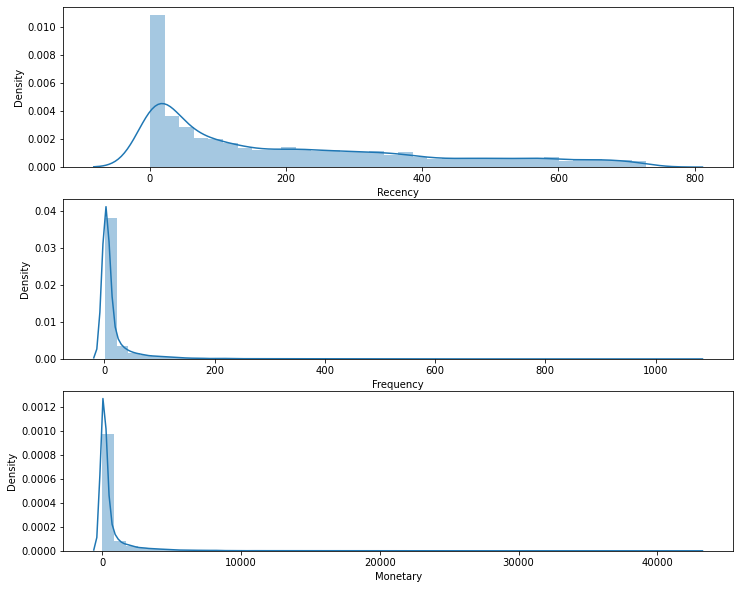

In [30]:
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm['Recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm['Frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm['Monetary'])
# Show the plot
plt.show()

The 3 densities are positively skewed 

In [31]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 4)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels, duplicates='drop')
# Create new columns R and F 
rfm = rfm.assign(R = r_groups.values, F = f_groups.values)
rfm.head()

,last_purchase,Recency,Frequency,Monetary,R,F
Cust_ID,,,,,,
8,2018-12-23,8,93,3210.558,4,3
50,2018-12-31,0,234,3458.033,4,3
72,2018-12-08,23,1,7.580,4,1
91,2018-12-09,22,5,109.470,4,2
112,2017-06-18,561,1,55.200,1,1


In [32]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)
# Create new column M
rfm = rfm.assign(M = m_groups.values)

In [33]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)
rfms = rfm
rfms.head()

,last_purchase,Recency,Frequency,Monetary,R,F,M,RFM_Segment
Cust_ID,,,,,,,,
8,2018-12-23,8,93,3210.558,4,3,4,434
50,2018-12-31,0,234,3458.033,4,3,4,434
72,2018-12-08,23,1,7.580,4,1,1,411
91,2018-12-09,22,5,109.470,4,2,2,422
112,2017-06-18,561,1,55.200,1,1,2,112


In [34]:

# Count num of unique segments
rfm_count_unique = rfms.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())


45


In [35]:
rfms['RFM_Score'] = rfms[['R','F','M']].sum(axis=1)
print(rfms['RFM_Score'].head())

Cust_ID
8      11
50     11
72      6
91      8
112     4
Name: RFM_Score, dtype: int64


In [37]:
# Count num of unique segments
rfm_count_unique = rfms.groupby('RFM_Score')['RFM_Score'].unique()
print(rfm_count_unique)

RFM_Score
3      [3]
4      [4]
5      [5]
6      [6]
7      [7]
8      [8]
9      [9]
10    [10]
11    [11]
Name: RFM_Score, dtype: object


In [38]:

# Define rfm_level function
def rfm_level(df):
    if (df['RFM_Score'] >= 9) :
        return 'VVIP - Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['M'] == 4)):
        return 'Big Spenders'
    elif ((df['RFM_Score'] >= 6) and (df['F'] >= 2)):
        return 'Loyal Customers "dima yjiw l magasin"' 
    elif ((df['RFM_Segment'] >= 221) or (df['RFM_Score'] >= 6)):
        return 'Potential Loyalists'
    elif (((df['RFM_Segment'] >= 121) and (df['R'] == 1)) or df['RFM_Score'] == 6):
        return 'Needs Attention'
    elif ((df['RFM_Score'] >= 3) and (df['R'] == 1)):
        return 'Almost Lost'
    else:
        return 'Lost Customers'

In [39]:
# Create a new variable RFM_Level
rfms['RFM_Segment'] = rfms.RFM_Segment.apply(lambda x: int(x))
rfms['Customer Segment'] = rfms.apply(rfm_level, axis=1)
rfms.head(10)

,last_purchase,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Customer Segment
Cust_ID,,,,,,,,,,
8,2018-12-23,8,93,3210.558,4,3,4,434,11,VVIP - Can't Loose Them
50,2018-12-31,0,234,3458.033,4,3,4,434,11,VVIP - Can't Loose Them
72,2018-12-08,23,1,7.580,4,1,1,411,6,Potential Loyalists
91,2018-12-09,22,5,109.470,4,2,2,422,8,"Loyal Customers ""dima yjiw l magasin"""
112,2017-06-18,561,1,55.200,1,1,2,112,4,Almost Lost
134,2017-12-12,384,6,38.690,1,2,2,122,5,Needs Attention
181,2018-12-31,0,34,730.054,4,3,4,434,11,VVIP - Can't Loose Them
187,2017-01-27,703,1,34.070,1,1,2,112,4,Almost Lost
198,2018-12-25,6,70,3706.332,4,3,4,434,11,VVIP - Can't Loose Them


In [42]:

# Calculate average values for each Customer Segment, and return a size of each segment 
rfm_level_agg = rfms.groupby('Customer Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg.head())

                                      Recency Frequency Monetary      
                                         mean      mean     mean count
Customer Segment                                                      
Almost Lost                             520.0       1.4     49.8  4977
Big Spenders                            274.0      21.0   1053.5   309
Lost Customers                          235.8       1.5     38.7  3056
Loyal Customers "dima yjiw l magasin"   168.0       7.5    206.2  3908
Needs Attention                         457.9       5.0     71.5   216


customers that we should keep ( bring the most profits to Monoprix ) are those who have a high RFM Score
For example, here Customer with the ID 8 is of 'high value" while the one with the ID 112 doesn't bring much profit to Monoprix 

## Customer segmentation using K-means clustering

In [35]:

rfm_segmentation = rfm.copy()

In [36]:
rfm_segmentation=rfm_segmentation.drop('last_purchase', axis=1)

In [37]:
from sklearn.cluster import KMeans

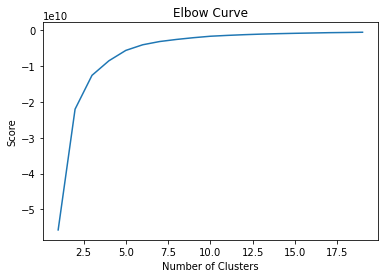

In [38]:

# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Based on this graph, best value of k is 4

In [39]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=4, random_state=0).fit(rfm_segmentation)

In [40]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

In [41]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,cluster
Cust_ID,,,,
72,23,1,7.580,0
91,22,5,109.470,0
112,561,1,55.200,0
134,384,6,38.690,0
181,0,34,730.054,0
187,703,1,34.070,0
234,108,3,38.325,0
282,563,5,78.785,0
308,254,4,100.605,0


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Recency'>

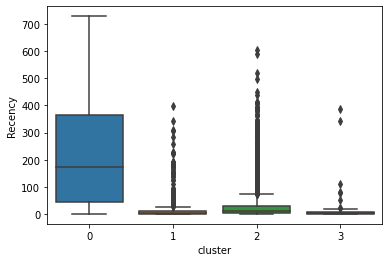

In [42]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

cluster 0 have high recency rate ( cad l customers that belong to that cluster aandhom prd twila majewech )  which is bad. cluster 1 and cluster 2 and 3 having low so they are in race of platinum
and gold customer.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

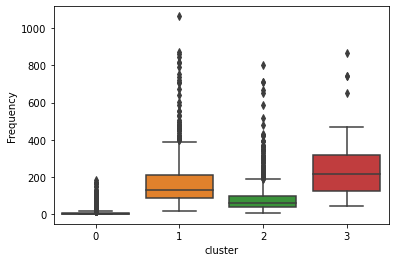

In [43]:

sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

cluster 0 and 2 have low frequency rate, which is bad 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

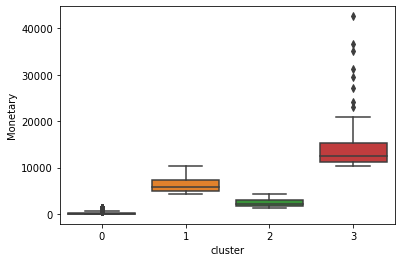

In [44]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

cluster 0 has low monetary rate which is bad, followed by cluster 2 

based in these initial observations, 
- cluster 0 is the worst 
- cluster 3 groups the best customers ( high value customers ) 
- cluster 1 and 2 are quite similar ..

In [51]:
df.shape

(3921694, 13)

In [52]:
rfm_segmentation.shape

(22990, 4)